<a href="https://colab.research.google.com/github/alexandresvifpb/assert_iaiot/blob/main/project_softex_ia_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URL do arquivo CSV no GitHub
csv_url = 'https://raw.githubusercontent.com/alexandresvifpb/assert_iaiot/main/Concrete_Data.CSV'

# Carregar o arquivo CSV em um DataFrame
df_concrete = pd.read_csv(csv_url)

# Exibir as primeiras linhas do DataFrame
print(df_concrete.head())

   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  ConcreteCompressiveStrength  
0          676.0   28                        79.99  
1          676.0   28                        61.89  
2          594.0  270                        40.27  
3          594.0  365                        41.05  
4          825.5  360                        44.30  


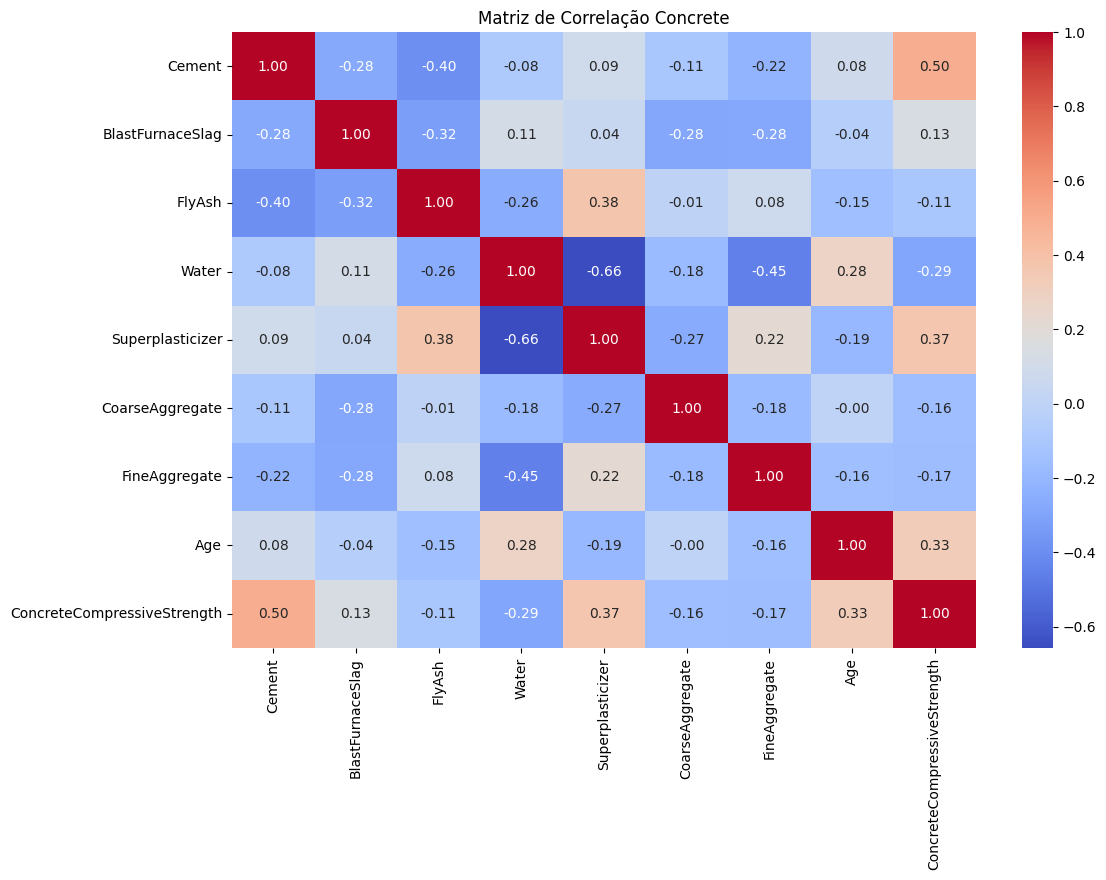


Dataset após pré-processamento:
    ConcreteCompressiveStrength  BlastFurnaceSlag    FlyAsh  Water  \
0                        79.99          1.000000  0.000000    0.0   
1                        61.89          1.000000  0.000000    0.0   
2                        40.27          0.526256  0.396494    0.0   
3                        41.05          0.526256  0.396494    0.0   
4                        44.30          0.220548  0.368392    0.0   

   Superplasticizer  CoarseAggregate  FineAggregate       Age  \
0          0.321086          0.07764       0.694767  0.205720   
1          0.321086          0.07764       0.738372  0.205720   
2          0.848243          0.00000       0.380814  0.000000   
3          0.848243          0.00000       0.380814  0.000000   
4          0.560703          0.00000       0.515698  0.580783   

   ConcreteCompressiveStrength  
0                     0.074176  
1                     0.074176  
2                     0.739011  
3                     1.0000

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2.1. Verificar e remover valores nulos
concrete_recognition = df_concrete.dropna()

# 2.3. Verificar se existe correspondência entre features
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = concrete_recognition.corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação Concrete")
plt.show()

# 2.4. Normalizar as features na escala 0..1
scaler = MinMaxScaler()
concrete_recognition_scaled = pd.DataFrame(scaler.fit_transform(concrete_recognition.drop(columns=['ConcreteCompressiveStrength'])), columns=concrete_recognition.columns[1:])

# Concatenar os labels (lettr) com as features normalizadas
concrete_recognition_processed = pd.concat([concrete_recognition['ConcreteCompressiveStrength'], concrete_recognition_scaled], axis=1)
print("\nDataset após pré-processamento:\n", concrete_recognition_processed.head())

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_dtm = []
rmse_results_model1_dtm = []
mae_results_model1_dtm = []

mse_results_model2_dtm = []
rmse_results_model2_dtm = []
mae_results_model2_dtm = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: Critério 'friedman_mse' e sem limite de profundidade
    dt_reg_model1 = DecisionTreeRegressor(criterion='poisson', random_state=42)
    dt_reg_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(dt_reg_model1, X_test, y_test)
    mse_results_model1_dtm.append(mse1)
    rmse_results_model1_dtm.append(rmse1)
    mae_results_model1_dtm.append(mae1)

    # Modelo 2: Critério 'squared_error' e profundidade máxima de 5
    dt_reg_model2 = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
    dt_reg_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(dt_reg_model2, X_test, y_test)
    mse_results_model2_dtm.append(mse2)
    rmse_results_model2_dtm.append(rmse2)
    mae_results_model2_dtm.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_dtm):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_dtm):.3f}')
print(f'MAE: {np.mean(mae_results_model1_dtm):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_dtm):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_dtm):.3f}')
print(f'MAE: {np.mean(mae_results_model2_dtm):.3f}')

Média dos Resultados para Modelo 1:
MSE: 46.947
RMSE: 6.780
MAE: 4.297

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 70.891
RMSE: 8.415
MAE: 6.476


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_knn = []
rmse_results_model1_knn = []
mae_results_model1_knn = []

mse_results_model2_knn = []
rmse_results_model2_knn = []
mae_results_model2_knn = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: KNN com vizinhança 5 e métrica de distância Euclidiana
    knn_model1 = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
    knn_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(knn_model1, X_test, y_test)
    mse_results_model1_knn.append(mse1)
    rmse_results_model1_knn.append(rmse1)
    mae_results_model1_knn.append(mae1)

    # Modelo 2: KNN com vizinhança 10 e métrica de distância Manhattan
    knn_model2 = KNeighborsRegressor(n_neighbors=10, metric='canberra')
    knn_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(knn_model2, X_test, y_test)
    mse_results_model2_knn.append(mse2)
    rmse_results_model2_knn.append(rmse2)
    mae_results_model2_knn.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_knn):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_knn):.3f}')
print(f'MAE: {np.mean(mae_results_model1_knn):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_knn):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_knn):.3f}')
print(f'MAE: {np.mean(mae_results_model2_knn):.3f}')

# InvalidParameterError: The 'metric' parameter of KNeighborsRegressor must be a str among {
# 'sqeuclidean', 'cosine', 'precomputed', 'yule', 'euclidean', 'rogerstanimoto', 'dice', 'russellrao', *'l1', 'correlation', 'chebyshev', *'cityblock', 'seuclidean', 'mahalanobis', 'kulsinski',
# MSE: 96.763; MSE: 96.189; MSE: error; MSE: warings; MSE: 450.342; MSE: 450.279; MSE: 516.698; MSE: 91.288; MSE: 101.701; MSE: 106.289; MSE: 91.288; MSE: error; MSE: error; MSE: 450.211
# 'jaccard', *'canberra', 'sokalmichener', 'haversine', 'sokalsneath', 'p', 'infinity', 'matching', 'hamming', 'pyfunc', 'nan_euclidean', 'manhattan', *'braycurtis', 'minkowski', 'l2', 'wminkowski'} or a callable. Got 'eucliddean' instead.
# MSE: 450.279; MSE: 47.528; MSE: 450.342; MSE: error; MSE: 450.279; MSE: 96.801; MSE: 106.289; MSE: 450.342; MSE: 141.871; MSE: error; MSE: 96.738; MSE: 91.288; MSE: 90.997; MSE: 96.801; MSE: 96.801; MSE: error

Média dos Resultados para Modelo 1:
MSE: 85.887
RMSE: 9.263
MAE: 7.077

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 47.528
RMSE: 6.877
MAE: 5.170


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_mlp = []
rmse_results_model1_mlp = []
mae_results_model1_mlp = []

mse_results_model2_mlp = []
rmse_results_model2_mlp = []
mae_results_model2_mlp = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: MLP com topologia (100, 50), 200 ciclos e função de ativação ReLU
    mlp_model1 = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1200, activation='relu', random_state=42)
    mlp_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(mlp_model1, X_test, y_test)
    mse_results_model1_mlp.append(mse1)
    rmse_results_model1_mlp.append(rmse1)
    mae_results_model1_mlp.append(mae1)

    # Modelo 2: MLP com topologia (50, 20), 100 ciclos e função de ativação Tangente Hiperbólica
    mlp_model2 = MLPRegressor(hidden_layer_sizes=(50, 20), max_iter=1500, activation='logistic', random_state=42, alpha=0.01)
    mlp_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(mlp_model2, X_test, y_test)
    mse_results_model2_mlp.append(mse2)
    rmse_results_model2_mlp.append(rmse2)
    mae_results_model2_mlp.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_mlp):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_mlp):.3f}')
print(f'MAE: {np.mean(mae_results_model1_mlp):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_mlp):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_mlp):.3f}')
print(f'MAE: {np.mean(mae_results_model2_mlp):.3f}')

# InvalidParameterError: The 'activation' parameter of MLPRegressor must be a str among {
# 'relu', 'tanh', 'logistic', 'identity'}. Got 'taanh' instead.
# MSE: 107.324; MSE: 97.683; MSE: 111.815

Média dos Resultados para Modelo 1:
MSE: 56.659
RMSE: 7.504
MAE: 5.845

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 97.408
RMSE: 9.835
MAE: 7.309


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_svm = []
rmse_results_model1_svm = []
mae_results_model1_svm = []

mse_results_model2_svm = []
rmse_results_model2_svm = []
mae_results_model2_svm = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: SVR com kernel RBF, C=1.0, gamma=0.1
    svr_model1 = SVR(kernel='rbf', C=1.0, gamma=0.1)
    svr_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(svr_model1, X_test, y_test)
    mse_results_model1_svm.append(mse1)
    rmse_results_model1_svm.append(rmse1)
    mae_results_model1_svm.append(mae1)

    # Modelo 2: SVR com kernel linear, C=1.0, gamma='scale' (auto)
    svr_model2 = SVR(kernel='linear', C=0.5, gamma='scale')
    svr_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(svr_model2, X_test, y_test)
    mse_results_model2_svm.append(mse2)
    rmse_results_model2_svm.append(rmse2)
    mae_results_model2_svm.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_svm):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_svm):.3f}')
print(f'MAE: {np.mean(mae_results_model1_svm):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_svm):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_svm):.3f}')
print(f'MAE: {np.mean(mae_results_model2_svm):.3f}')

# InvalidParameterError: The 'kernel' parameter of SVR must be a str among {
# 'poly', 'precomputed', 'rbf', 'sigmoid', 'linear'} or a callable. Got 'rbbf' instead.

Média dos Resultados para Modelo 1:
MSE: 263.402
RMSE: 16.208
MAE: 12.864

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 130.267
RMSE: 11.389
MAE: 8.524


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_rf = []
rmse_results_model1_rf = []
mae_results_model1_rf = []

mse_results_model2_rf = []
rmse_results_model2_rf = []
mae_results_model2_rf = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: Random Forest com 100 árvores, critério 'poisson', profundidade máxima de 10
    rf_model1 = RandomForestRegressor(n_estimators=100, criterion='poisson', max_depth=10, random_state=42)
    rf_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(rf_model1, X_test, y_test)
    mse_results_model1_rf.append(mse1)
    rmse_results_model1_rf.append(rmse1)
    mae_results_model1_rf.append(mae1)

    # Modelo 2: Random Forest com 50 árvores, critério 'squared_error', profundidade máxima de 5
    rf_model2 = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=5, random_state=42)
    rf_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(rf_model2, X_test, y_test)
    mse_results_model2_rf.append(mse2)
    rmse_results_model2_rf.append(rmse2)
    mae_results_model2_rf.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_rf):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_rf):.3f}')
print(f'MAE: {np.mean(mae_results_model1_rf):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_rf):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_rf):.3f}')
print(f'MAE: {np.mean(mae_results_model2_rf):.3f}')

# InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {
# 'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mse' instead.
# MSE: 25.751; MSE: 47.911; MSE: 46.062; MSE: 46.102

Média dos Resultados para Modelo 1:
MSE: 25.751
RMSE: 5.068
MAE: 3.565

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 46.062
RMSE: 6.772
MAE: 5.243


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 5.1. Separar os dados de treinamento e teste (80% e 20%)
X = df_concrete.drop(columns=['ConcreteCompressiveStrength'])
y = df_concrete['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para calcular métricas e imprimir resultados
def calculate_metrics_and_print(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, mae

# Listas para armazenar os resultados
mse_results_model1_gb = []
rmse_results_model1_gb = []
mae_results_model1_gb = []

mse_results_model2_gb = []
rmse_results_model2_gb = []
mae_results_model2_gb = []

# 5.3. Executar 10 vezes o Train-Test-Split e treinar/predizer modelos
for i in range(10):
    # Separar os dados de treinamento e teste (80% e 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Modelo 1: Gradient Boosting com 100 estimadores, taxa de aprendizado de 0.1, profundidade máxima de 5
    gb_model1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    gb_model1.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse1, rmse1, mae1 = calculate_metrics_and_print(gb_model1, X_test, y_test)
    mse_results_model1_gb.append(mse1)
    rmse_results_model1_gb.append(rmse1)
    mae_results_model1_gb.append(mae1)

    # Modelo 2: Gradient Boosting com 50 estimadores, taxa de aprendizado de 0.05, profundidade máxima de 3
    gb_model2 = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
    gb_model2.fit(X_train, y_train)

    # Avaliar o desempenho nos dados de teste
    mse2, rmse2, mae2 = calculate_metrics_and_print(gb_model2, X_test, y_test)
    mse_results_model2_gb.append(mse2)
    rmse_results_model2_gb.append(rmse2)
    mae_results_model2_gb.append(mae2)

# 5.4. Calcular e apresentar a média das métricas para cada modelo
print(f'Média dos Resultados para Modelo 1:')
print(f'MSE: {np.mean(mse_results_model1_gb):.3f}')
print(f'RMSE: {np.mean(rmse_results_model1_gb):.3f}')
print(f'MAE: {np.mean(mae_results_model1_gb):.3f}')

print('\n' + '-' * 40 + '\n')

print(f'Média dos Resultados para Modelo 2:')
print(f'MSE: {np.mean(mse_results_model2_gb):.3f}')
print(f'RMSE: {np.mean(rmse_results_model2_gb):.3f}')
print(f'MAE: {np.mean(mae_results_model2_gb):.3f}')

Média dos Resultados para Modelo 1:
MSE: 19.902
RMSE: 4.443
MAE: 3.081

----------------------------------------

Média dos Resultados para Modelo 2:
MSE: 51.939
RMSE: 7.198
MAE: 5.696


In [9]:
import pandas as pd

# Criar um DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Modelo', 'MSE', 'RMSE', 'MAE'])

# Adicionar resultados dos modelos à tabela
results = pd.concat([
    results,
    pd.DataFrame({
        'Modelo': ['Decision Tree Modelo 1'],
        'MSE': [np.mean(mse_results_model1_dtm)],
        'RMSE': [np.mean(rmse_results_model1_dtm)],
        'MAE': [np.mean(mae_results_model1_dtm)]
    }),
    pd.DataFrame({
        'Modelo': ['Decision Tree Modelo 2'],
        'MSE': [np.mean(mse_results_model2_dtm)],
        'RMSE': [np.mean(rmse_results_model2_dtm)],
        'MAE': [np.mean(mae_results_model2_dtm)]
    }),
    pd.DataFrame({
        'Modelo': ['KNN Modelo 1'],
        'MSE': [np.mean(mse_results_model1_knn)],
        'RMSE': [np.mean(rmse_results_model1_knn)],
        'MAE': [np.mean(mae_results_model1_knn)]
    }),
    pd.DataFrame({
        'Modelo': ['KNN Modelo 2'],
        'MSE': [np.mean(mse_results_model2_knn)],
        'RMSE': [np.mean(rmse_results_model2_knn)],
        'MAE': [np.mean(mae_results_model2_knn)]
    }),
    pd.DataFrame({
        'Modelo': ['MLP Modelo 1'],
        'MSE': [np.mean(mse_results_model1_mlp)],
        'RMSE': [np.mean(rmse_results_model1_mlp)],
        'MAE': [np.mean(mae_results_model1_mlp)]
    }),
    pd.DataFrame({
        'Modelo': ['MLP Modelo 2'],
        'MSE': [np.mean(mse_results_model2_mlp)],
        'RMSE': [np.mean(rmse_results_model2_mlp)],
        'MAE': [np.mean(mae_results_model2_mlp)]
    }),
    pd.DataFrame({
        'Modelo': ['SVM Modelo 1'],
        'MSE': [np.mean(mse_results_model1_svm)],
        'RMSE': [np.mean(rmse_results_model1_svm)],
        'MAE': [np.mean(mae_results_model1_svm)]
    }),
    pd.DataFrame({
        'Modelo': ['SVM Modelo 2'],
        'MSE': [np.mean(mse_results_model2_svm)],
        'RMSE': [np.mean(rmse_results_model2_svm)],
        'MAE': [np.mean(mae_results_model2_svm)]
    }),
    pd.DataFrame({
        'Modelo': ['Random Forest Modelo 1'],
        'MSE': [np.mean(mse_results_model1_rf)],
        'RMSE': [np.mean(rmse_results_model1_rf)],
        'MAE': [np.mean(mae_results_model1_rf)]
    }),
    pd.DataFrame({
        'Modelo': ['Random Forest Modelo 2'],
        'MSE': [np.mean(mse_results_model2_rf)],
        'RMSE': [np.mean(rmse_results_model2_rf)],
        'MAE': [np.mean(mae_results_model2_rf)]
    }),
    pd.DataFrame({
        'Modelo': ['Gradient Boosting Modelo 1'],
        'MSE': [np.mean(mse_results_model1_gb)],
        'RMSE': [np.mean(rmse_results_model1_gb)],
        'MAE': [np.mean(mae_results_model1_gb)]
    }),
    pd.DataFrame({
        'Modelo': ['Gradient Boosting Modelo 2'],
        'MSE': [np.mean(mse_results_model2_gb)],
        'RMSE': [np.mean(rmse_results_model2_gb)],
        'MAE': [np.mean(mae_results_model2_gb)]
    }),
], ignore_index=True)

# Apresentar a tabela
print(results)

                        Modelo         MSE       RMSE        MAE
0       Decision Tree Modelo 1   46.946692   6.779941   4.296850
1       Decision Tree Modelo 2   70.891090   8.415397   6.475501
2                 KNN Modelo 1   85.887366   9.263000   7.077417
3                 KNN Modelo 2   47.528075   6.876783   5.170060
4                 MLP Modelo 1   56.659250   7.503903   5.845233
5                 MLP Modelo 2   97.408223   9.834545   7.309290
6                 SVM Modelo 1  263.402186  16.207504  12.863646
7                 SVM Modelo 2  130.266572  11.388818   8.524163
8       Random Forest Modelo 1   25.751345   5.068260   3.564631
9       Random Forest Modelo 2   46.061741   6.771785   5.243291
10  Gradient Boosting Modelo 1   19.902262   4.443260   3.081031
11  Gradient Boosting Modelo 2   51.939407   7.198442   5.695506
